# LUMINEX——pYAP, pABL, and pSRC DASATINIB DOSE RESPONSE 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# New vs Old MEK kit and lysis buffer test

In [60]:
mfi_AS = pd.read_csv("msresist/data/Validations/Luminex/DasatinibDR_newMEK_lysisbuffer.csv")
mfi_AS = pd.melt(mfi_AS, id_vars=["Treatment", "Line", "Lysis_Buffer"], value_vars=["p-MEK", "p-YAP", "p-ABL", "p-SRC"], var_name="Protein", value_name="p-Signal")
mfi_YAP = pd.read_csv("msresist/data/Validations/Luminex/DasatinibDR_pYAP127_check.csv")
mfi_YAP = pd.melt(mfi_YAP, id_vars=["Treatment", "Line", "Lysis_Buffer"], value_vars=["p-MEK", "p-YAP(S127)"], var_name="Protein", value_name="p-Signal")

[Text(0, 0, 'UT'),
 Text(1, 0, 'E(A)'),
 Text(2, 0, 'E(A)+50nM Das'),
 Text(3, 0, 'E(A)+100nM Das'),
 Text(4, 0, 'E(A)+200nM Das'),
 Text(5, 0, 'E(A)+500nM Das')]

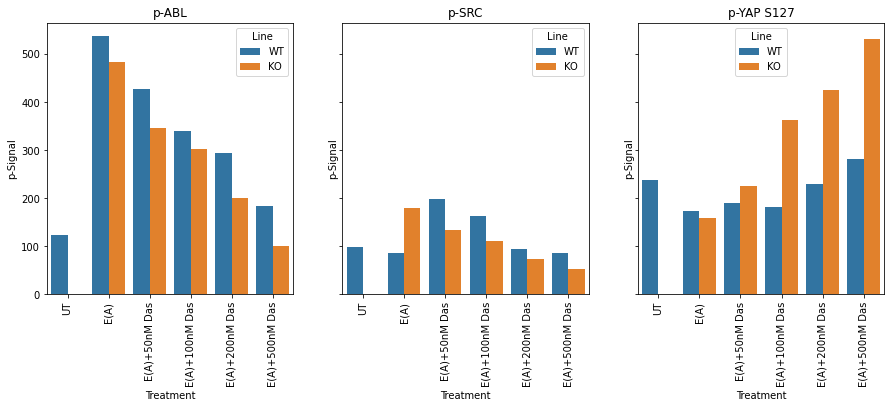

In [61]:
abl = mfi_AS[(mfi_AS["Protein"] == "p-ABL") & (mfi_AS["Lysis_Buffer"] == "RIPA")].iloc[:-1, :]
abl["Treatment"] = [t.replace("A", "(A)") for t in abl["Treatment"]]
abl["Treatment"][6:] = abl["Treatment"][1:6]
src = mfi_AS[(mfi_AS["Protein"] == "p-SRC") & (mfi_AS["Lysis_Buffer"] == "RIPA")].iloc[:-1, :]
src["Treatment"] = [t.replace("A", "(A)") for t in src["Treatment"]]
src["Treatment"][6:] = src["Treatment"][1:6]
yap = mfi_YAP[(mfi_YAP["Protein"] == "p-YAP(S127)") & (mfi_YAP["Lysis_Buffer"] == "RIPA")].iloc[:-1, :]
yap["Treatment"] = [t.replace("A", "(A)") for t in yap["Treatment"]]
yap["Treatment"][6:] = yap["Treatment"][1:6]

_, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.barplot(data=abl, x="Treatment", y="p-Signal", hue="Line", ax=ax[0])
ax[0].set_title("p-ABL")
ax[0].set_xticklabels(abl["Treatment"][:6], rotation=90)
sns.barplot(data=src, x="Treatment", y="p-Signal", hue="Line", ax=ax[1])
ax[1].set_title("p-SRC")
ax[1].set_xticklabels(src["Treatment"][:6], rotation=90)
sns.barplot(data=yap, x="Treatment", y="p-Signal", hue="Line", ax=ax[2])
ax[2].set_title("p-YAP S127")
ax[2].set_xticklabels(yap["Treatment"][:6], rotation=90)

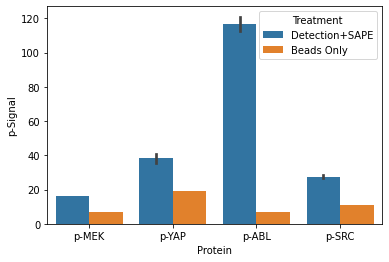

In [7]:
d = mfi[mfi["Line"] == "Background"]
ax = sns.barplot(data=d, x="Protein", y="p-Signal", hue="Treatment")

Text(0.5, 0.98, 'Background Signal')

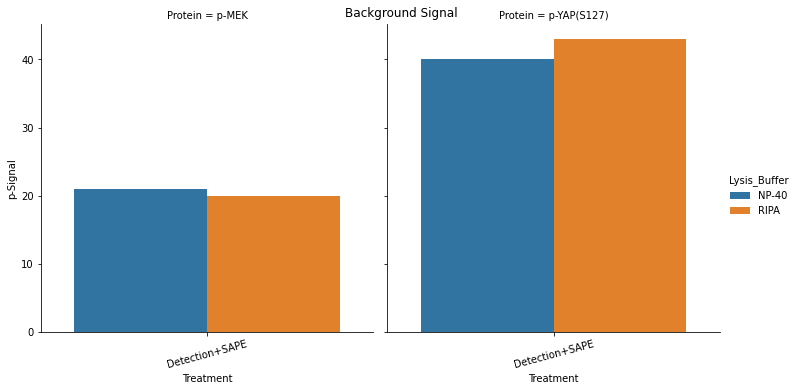

In [8]:
mfi = pd.read_csv("msresist/data/Validations/Luminex/DasatinibDR_pYAP127_check.csv")
mfi = pd.melt(mfi, id_vars=["Treatment", "Line", "Lysis_Buffer"], value_vars=["p-MEK", "p-YAP(S127)"], var_name="Protein", value_name="p-Signal")

mfi_wt = mfi[mfi["Line"] == "Background"]
ax = sns.catplot(data=mfi_wt, x="Treatment", y="p-Signal", hue="Lysis_Buffer", col="Protein", kind="bar")
ax.set_xticklabels(rotation=15)
ax.fig.suptitle('Background Signal')